In [1]:
import numpy as np
from numpy import linalg as LA
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def thomas_algorithm(a, b, c, d):
    """
    Решает систему линейных уравнений Ax = d,
    где A - трёхдиагональная матрица.
    
    :param a: Поддиагональ
    :param b: Основная диагональ
    :param c: Наддиагональ
    :param d: Правая часть (столбец)
    :return: Решение x
    """
    n = len(d)
    
    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)

    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, n-1):
        denominator = b[i] - a[i-1] * c_prime[i-1]
        c_prime[i] = c[i] / denominator
        d_prime[i] = (d[i] - a[i-1] * d_prime[i-1]) / denominator

    d_prime[n-1] = (d[n-1] - a[n-2] * d_prime[n-2]) / (b[n-1] - a[n-2] * c_prime[n-2])

    x = np.zeros(n)
    x[n-1] = d_prime[n-1]

    for i in range(n-2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i+1]


    # residual = np.zeros(n)
    # residual[0] = b[0] * x[0] + c[0] * x[1] - d[0]
    # for i in range(1, n-1):
    #     residual[i] = a[i-1] * x[i-1] + b[i] * x[i] + c[i] * x[i+1] - d[i]
    # residual[n-1] = a[n-2] * x[n-2] + b[n-1] * x[n-1] - d[n-1]
    
    # print("Residual error:", residual)

    return x

Решаем дифференциальное уравнение:

$$
- \nu T_{xx} + U T_x = f
$$

с помощью схемы:

$$
- \nu \frac{T_{m+1} - 2 T_m + T_{m-1}}{h^2} + U \frac{T_{m+1} - T_{m-1}}{2h} = f_m
$$
$$
T_0 = 0, \quad T_N = 0
$$

Схема порождает матрицу, на диагонали которой лежат элементы:

$$
T_{m+1} (\frac{U}{2h} - \frac{\nu}{h^2}), \quad T_m (\frac{2 \nu}{h^2}), \quad T_{m-1} (-\frac{U}{2h} - \frac{\nu}{h^2}),
$$

а точнее такую:

$$
D = 
\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 & 0 \\
-\frac{U}{2h} - \frac{\nu}{h^2} & \frac{2 \nu}{h^2} & \frac{U}{2h} - \frac{\nu}{h^2} & \cdots & 0 & 0 \\
0 & -\frac{U}{2h} - \frac{\nu}{h^2} & \frac{2 \nu}{h^2} & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & -\frac{U}{2h} - \frac{\nu}{h^2} & \frac{2 \nu}{h^2} & \frac{U}{2h} - \frac{\nu}{h^2} \\
0 & 0 & 0 & \cdots & 0 & 1 \\
\end{pmatrix}
$$.

Соответственно, имеем систему:
$$
D T = f.
$$

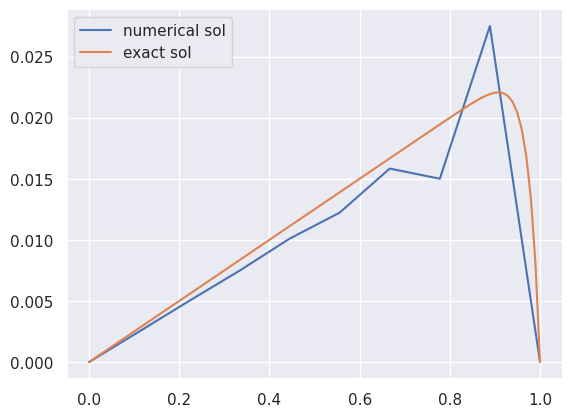

In [3]:
N = 10
U = 40
nu = 1
h = 0.1

upper_diag = (U / (2 * h) - nu / (h**2)) * np.ones(N - 1)
centr_diag = 2 * nu / (h**2) * np.ones(N)
lower_diag = (- U / (2 * h) - nu / (h**2)) * np.ones(N - 1)

upper_diag[0]   = 0
lower_diag[-1]  = 0
centr_diag[0]   = 1
centr_diag[-1]  = 1 

f = np.ones(N)
f[0] = 0
f[-1] = 0

ans = thomas_algorithm(lower_diag, centr_diag, upper_diag, f)

x = np.linspace(0, 1, 100)

plt.plot(np.linspace(0, 1, N), ans, label="numerical sol")
plt.plot(x, 1.0 / U * (x - (1.0 - np.exp(U * x / nu))/(1.0 - np.exp(U / nu))) , label="exact sol")
plt.legend()

В этой схеме мы взяли центральные разности. Теперь попробуем левые разности и правые разности:

$$
- \nu \frac{T_{m+1} - 2 T_m + T_{m-1}}{h^2} + U \frac{T_{m+1} - T_{m}}{h} = f_m
$$
$$
T_0 = 0, \quad T_N = 0
$$

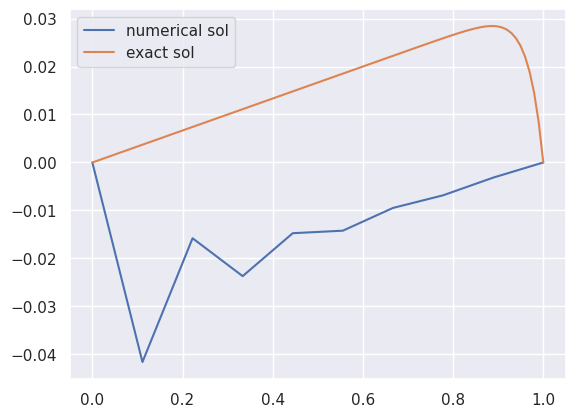

In [4]:
N = 10
U = 30
nu = 1
h = 0.1

upper_diag = (U / (h) - nu / (h**2)) * np.ones(N - 1)
centr_diag = (-U / h + 2 * nu / (h**2)) * np.ones(N)
lower_diag = (- nu / (h**2)) * np.ones(N - 1)

upper_diag[0]   = 0
lower_diag[-1]  = 0
centr_diag[0]   = 1
centr_diag[-1]  = 1 

f = np.ones(N)
f[0] = 0
f[-1] = 0

ans = thomas_algorithm(lower_diag, centr_diag, upper_diag, f)

x = np.linspace(0, 1, 100)

plt.plot(np.linspace(0, 1, N), ans, label="numerical sol")
plt.plot(x, 1.0 / U * (x - (1.0 - np.exp(U * x / nu))/(1.0 - np.exp(U / nu))) , label="exact sol")
plt.legend()

Что-то пошло сильно не так. 

$$
- \nu \frac{T_{m+1} - 2 T_m + T_{m-1}}{h^2} + U \frac{T_{m} - T_{m-1}}{h} = f_m
$$
$$
T_0 = 0, \quad T_N = 0
$$

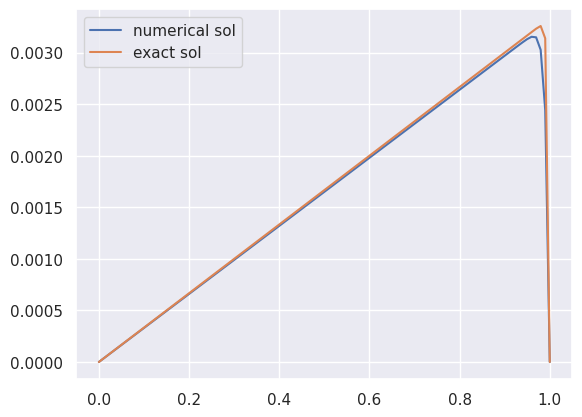

In [5]:
N = 100
U = 300
nu = 1
h = 1 / N

upper_diag = ( - nu / (h**2)) * np.ones(N - 1)
centr_diag = (U / h + 2 * nu / (h**2)) * np.ones(N)
lower_diag = (- U / (h) - nu / (h**2)) * np.ones(N - 1)

upper_diag[0]   = 0
lower_diag[-1]  = 0
centr_diag[0]   = 1
centr_diag[-1]  = 1 

f = np.ones(N)
f[0] = 0
f[-1] = 0

ans = thomas_algorithm(lower_diag, centr_diag, upper_diag, f)

x = np.linspace(0, 1, 100)

plt.plot(np.linspace(0, 1, N), ans, label="numerical sol")
plt.plot(x, 1.0 / U * (x - (1.0 - np.exp(U * x / nu))/(1.0 - np.exp(U / nu))) , label="exact sol")
plt.legend()

Видим, что правые разности даже лучше, чем центральные - при том же количестве точек, численное решение очень близко к точному. 

Дело здесь в том, что правые разности улавливают направление движения гармоник (движущихся вправо). А левые разности даже теоретически не могут восстановить правильную динамику, поскольку нужная нам правая точка даже не участвует в численной схеме.